###  Importing Necessary Libraries 

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
url = 'https://raw.githubusercontent.com/Aditya-Rajgor/Internship-Projects/main/Prediction%20using%20Supervised%20ML/data.csv'
df = pd.read_csv(url)

In [52]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [53]:
df.shape

(25, 2)

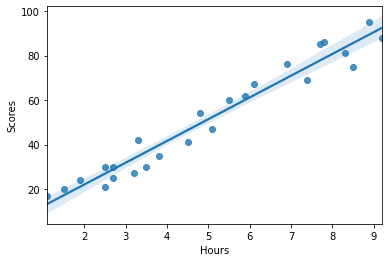

In [61]:
sns.regplot(x='Hours',y='Scores',data=df)

In [54]:
X = df['Hours'].values.reshape(-1, 1)
y= df['Scores'].values.reshape(-1, 1)

In [55]:
linreg = LinearRegression()

In [56]:
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
bins=[0,1,2,3,4,5,6,7,8,9,10]

#### Predict the percentage of an student based on the no. of study hours.

In [94]:
binned = pd.cut(df['Hours'],bins=bins)

In [96]:
binned.value_counts(normalize=True)

(3, 4]     0.16
(2, 3]     0.16
(8, 9]     0.12
(7, 8]     0.12
(5, 6]     0.12
(1, 2]     0.12
(6, 7]     0.08
(4, 5]     0.08
(9, 10]    0.04
(0, 1]     0.00
Name: Hours, dtype: float64

There is no student with less or equal to an hour of study time.
I think They forgot to count me

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [58]:
linreg.predict(np.array(9.25).reshape(-1,1))

array([[92.90985477]])

## Mean sqaered error & doble check the value

In [68]:
Predicted = linreg.predict(X)

In [70]:
mean_squared_error(y,Predicteced)

28.882730509245466

In [77]:
df['Predicted']=Predicted

In [81]:
df['Diff'] = df['Scores']- df['Predicted']

In [83]:
df['Squared_Diff']=df['Diff']**2

In [84]:
df.head()

,Hours,Scores,Predicted,Diff,Squared_Diff
0,2.5,21,26.923182,-5.923182,35.084084
1,5.1,47,52.340271,-5.340271,28.518491
2,3.2,27,33.766244,-6.766244,45.782061
3,8.5,75,85.578002,-10.578002,111.894131
4,3.5,30,36.698985,-6.698985,44.876404


In [85]:
df['Squared_Diff'].mean()

28.88273050924547